# Computation of $C_{k,l}$
This notebooks computes the first few terms of $C_{k,l}$, a combinatorial term that appears in the moments of the abosorbing time of states in an absorbing Markov chain. See [here](https://hackmd.io/@sueiwenchen/absorbing-markov-chains) for details

In [159]:
from itertools import combinations
from math import factorial, comb, log
from functools import reduce

## Original form

In [134]:
take_difference = lambda l: [l[i+1]-l[i] for i in range(len(l)-1)]
def C_k_l(k,l):
    k_fact = factorial(k)
    combs = list(combinations(range(1, k), l)) # l elements from [1,...,k-1]
    ext_comb = list(map(lambda x: [0, *x, k], combs))
    diff_comb = list(map(take_difference, ext_comb))
    fact_diff = [list(map(factorial, diff)) for diff in diff_comb]
    product   = [reduce(lambda x,y: x*y, fact, 1) for fact in fact_diff]
    k_fact_quo = list(map(lambda x: k_fact/x, product))
    c_k_l = reduce(lambda x,y: x+y, k_fact_quo, 0)
    return int(c_k_l)

In [228]:
for k in range(1,11):
    print(k, end='\t')
    for l in range(k):
        print(C_k_l(k,l), end=' ')
    print()

1	1 
2	1 2 
3	1 6 6 
4	1 14 36 24 
5	1 30 150 240 120 
6	1 62 540 1560 1800 720 
7	1 126 1806 8400 16800 15120 5040 
8	1 254 5796 40824 126000 191520 141120 40320 
9	1 510 18150 186480 834120 1905120 2328480 1451520 362880 
10	1 1022 55980 818520 5103000 16435440 29635200 30240000 16329600 3628800 


# Recursive form
Using multinomial coefficient we have the following relation:
$$\sum_{j=0}^l \binom{l+1}{j} C_{k,l-j} = (l+1)^k$$

In [130]:
def verify_recursion(k,l):
    C_k = [C_k_l(k,ll) for ll in range(l+1)][::-1]
    comb_c = [comb(l+1, j) for j in range(l+1)]
    prod = [comb_c[j]*C_k[j] for j in range(l+1)]
    lhs = reduce(lambda x,y: x+y, prod, 0)
    # print(lhs, (l+1)**k)
    assert lhs == (l+1)**k

In [131]:
for k in range(10):
    for l in range(k):
        verify_recursion(k,l)

# Power expression
Next we verify another expression in terms of powers of $k$.

In [267]:
def power_expression(k,l):
    c_k_j = (l+1)**k
    for m in range(1,l+1):
        coeff = -comb(l+1,m) # when j=0 the coefficient is -1 * (l+1 choose m)
        for j in range(1, l+1-m): # j = 1,..., l-m
            comb_j = list(combinations(range(m+1,l+1), j))
            extend_comb_j = list(map(lambda x: [m, *x, l+1][::-1], comb_j))
            extract_pairs = lambda ll: [(ll[i], ll[i+1]) for i in range(len(ll)-1)]
            pairs = list(map(extract_pairs, extend_comb_j))
            # print(pairs)
            binom = [list(map(lambda x: comb(*x), seq)) for seq in pairs]
            # print(binom)
            coeff_j =  [reduce(lambda x,y: x*y, b, 1) for b in binom]
            # print(coeff_j)
            coeff += (-1)**(j+1) * sum(coeff_j)
        c_k_j += coeff * m**k
    return c_k_j

In [270]:
# check correctness
for k in range(1,11):
    for l in range(k):
        assert power_expression(k,l)==C_k_l(k,l)

## Visualization

In [271]:
import matplotlib.pyplot as plt

In [147]:
k_to_C_kl = [[C_k_l(k,l) for l in range(k)] for k in range(1,21)]

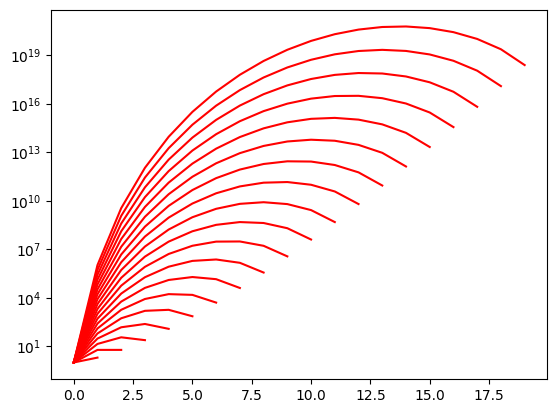

In [274]:
n=20
for k in range(len(k_to_C_kl[:n])):
    ckl = k_to_C_kl[k]
    plt.plot(range(len(ckl)), ckl, color='r')
plt.yscale('log')